## 今天的範例，帶大家實際操作鐵達尼號的資料集
關於重覆和遺失值處理

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from IPython.display import display
#讓圖可以在 jupyter notebook顯示
%matplotlib inline

### 輸入訓練資料(loading data)

In [4]:
df_train = pd.read_csv("Titanic_train.csv")

In [5]:
#印出前幾筆看資料的狀態

display(df_train.head(5))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# 資料的比數
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


---
### 探索性分析:  觀察是否有重覆

In [56]:
# 方法 1: duplicated()
len(df_train.duplicated()) == len(df_train)

True

In [13]:
#顯示有重覆的資訊:

df_train.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [61]:
# 方法 1 解釋 
df_dup = pd.DataFrame({
    'brand': ['Yum Yum', 'Yum Yum', 'Indomie', 'Indomie', 'Indomie'],
    'style': ['cup', 'cup', 'cup', 'pack', 'pack'],
    'rating': [4, 4, 3.5, 15, 5]
})
df_dup

,brand,style,rating
0,Yum Yum,cup,4.0
1,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


In [60]:
df_dup.duplicated()

0    False
1     True
2    False
3    False
4    False
dtype: bool

In [62]:
# 方法 2
#產生一個不重覆的資料集，透過 drop_duplicates 函數
nodup_df_train = df_train.drop_duplicates(subset=None, keep='first', inplace=False)

if nodup_df_train.shape[1] == df_train.shape[1]:
    print("no duplicates")

no duplicates


In [63]:
nodup_df_train.shape, df_train.shape

((891, 12), (891, 12))

---
### 探索性分析: 觀察是否有遺失值

In [15]:
#判斷每一個資料點，是否為空值:

print(df_train.isnull().head(5))

   PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0        False     False   False  False  False  False  False  False   False   
1        False     False   False  False  False  False  False  False   False   
2        False     False   False  False  False  False  False  False   False   
3        False     False   False  False  False  False  False  False   False   
4        False     False   False  False  False  False  False  False   False   

    Fare  Cabin  Embarked  
0  False   True     False  
1  False  False     False  
2  False   True     False  
3  False  False     False  
4  False   True     False  


In [19]:
df_train['PassengerId']

0        1
1        2
2        3
3        4
4        5
      ... 
886    887
887    888
888    889
889    890
890    891
Name: PassengerId, Length: 891, dtype: int64

In [26]:
# 會判斷哪些”列”存在缺失值
# any：判斷一個 tuple 或者 list 是否全為空/0/False。

print(df_train.isnull().any()) # 該欄有某列是空值＝True

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool


In [17]:
# 統計 data 裡有空值的變數個數

print(df_train.isnull().any().sum())

3


---
`isnull()` 搭配 `any()`

In [20]:
df = pd.DataFrame(dict(age=[5, 6, np.NaN],
                       born=[pd.NaT, pd.Timestamp('1939-05-27'),
                             pd.Timestamp('1940-04-25')],
                       name=['Alfred', 'Batman', ''],
                       toy=[None, 'Batmobile', 'Joker']))

In [21]:
df

,age,born,name,toy
0,5.0,NaT,Alfred,None
1,6.0,1939-05-27,Batman,Batmobile
2,NaN,1940-04-25,,Joker


In [25]:
df.isnull() # 空值＝True

,age,born,name,toy
0,False,True,False,True
1,False,False,False,False
2,True,False,False,False


In [23]:
df.isnull().any() # 該欄有某列是空值＝True

age      True
born     True
name    False
toy      True
dtype: bool

---

In [27]:
# 當有些資料用 "null" 代表空值時，需要先做轉換
df_train = df_train.replace('null', np.NaN)

# 統計 data 裡每一列是否有空值
print(df_train.isnull().any())

# 統計 data 裡有空值的變數個數
print(df_train.isnull().any().sum())

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool
3


In [31]:
df_train.isnull().values

array([[False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False],
       ...,
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False]])

In [34]:
# 可以只顯示存在缺失值的行列，清楚地確定缺失值的狀態
# 代表有缺時的地方才顯示 `df_train.isnull().values == True`
df_train[df_train.isnull().values == True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


---
## 補值

### 1. 補固定值

mean: 29.69911764705882
std: 14.526497332334042


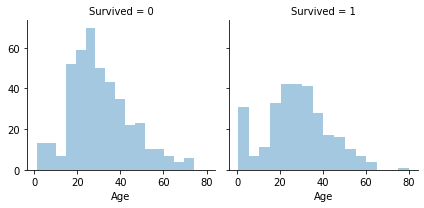

In [37]:
# 我們以 Age 為例，進行補植
# 補值前 平均值
print('mean:', df_train['Age'].mean()) # age平均
print('std:', df_train['Age'].std())   # age標準差

# 連續型用分布圖形來看
g = sns.FacetGrid(df_train, col='Survived')
g.map(sns.distplot, 'Age', kde=False);

mean: 23.79929292929293
std: 17.596074065915875


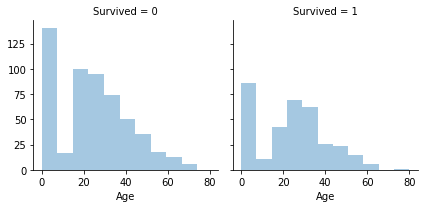

In [39]:
#補值後
df_train['Age'] = df_train['Age'].fillna(0)

print('mean:', df_train['Age'].mean()) # age平均
print('std:', df_train['Age'].std())   # age標準差

df_train[df_train['Age'].isnull().values == True]

# 連續型用分布圖形來看
g = sns.FacetGrid(df_train, col='Survived')
g.map(sns.distplot, 'Age', kde=False);

* 補完就沒有遺失值了，但是看到這樣的補值效果，平均值上有很明顯的差異
* 可以看出死亡族群，年齡遺失的比例比較高
* 用0 來補不是一個好的策略

---

### 2. 補平均數

mean: 29.69911764705882
std: 14.526497332334042


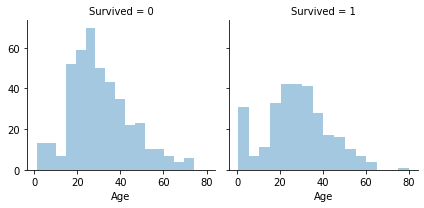

In [42]:
# 我們以 Age 為例，進行補植
# 補值前: 平均值
df_train = pd.read_csv("Titanic_train.csv")
print('mean:', df_train['Age'].mean()) # age平均
print('std:', df_train['Age'].std())   # age標準差

# 連續型用分布圖行來看
g = sns.FacetGrid(df_train, col='Survived')
g.map(sns.distplot, 'Age', kde=False);

mean: 29.69911764705882
std: 13.002015226002882


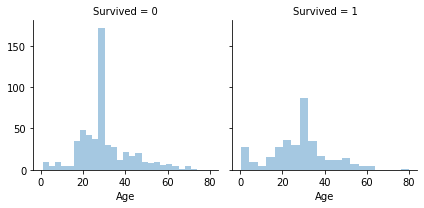

In [43]:
# 補值後
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].mean())
print('mean:', df_train['Age'].mean()) # age平均
print('std:', df_train['Age'].std())   # age標準差
df_train[df_train['Age'].isnull().values==True]

# 連續型用分布圖行來看
g = sns.FacetGrid(df_train, col='Survived')
g.map(sns.distplot, 'Age', kde=False);

* 補平均數，平均數上沒有差異性，標準差接近
* 圖形中高點的位置，就是平均數的位置

---
### 3. 前值補後值 bfill
比較平均，不像前兩個方法，集中在某一些值上面。

mean: 29.69911764705882
std: 14.526497332334042


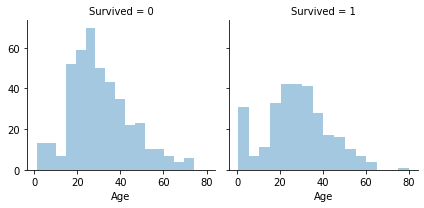

In [45]:
# 我們以  Age 為例，進行，由後往前補
# 補值前: 平均值
df_train = pd.read_csv("Titanic_train.csv")
print('mean:', df_train['Age'].mean()) # age平均
print('std:', df_train['Age'].std())   # age標準差

# 連續型用分布圖行來看
g = sns.FacetGrid(df_train, col='Survived')
g.map(sns.distplot, 'Age', kde=False);

mean: 29.87056116722783
std: 14.597667657302386


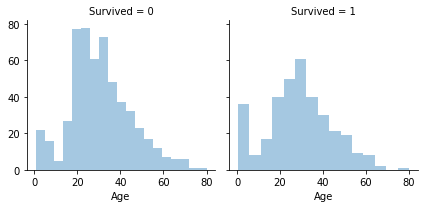

In [46]:
#補值後
df_train['Age']=df_train['Age'].fillna(method='bfill')
print('mean:', df_train['Age'].mean()) # age平均
print('std:', df_train['Age'].std())   # age標準差
df_train[df_train['Age'].isnull().values==True]

#補平均數，平均數上沒有差異性，標準差接近
# 連續型用分布圖行來看
g = sns.FacetGrid(df_train, col='Survived')
g.map(sns.distplot, 'Age', kde=False);

---
### 後值補前值 ffill / pad
比較平均，不像前兩個方法，集中在某一些值上面。

mean: 29.69911764705882
std: 14.526497332334042


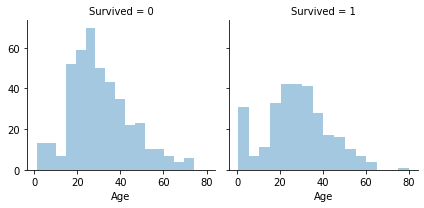

In [48]:
# 我們以  Age 為例，進行，由後往前補
#補值前 平均值
df_train = pd.read_csv("Titanic_train.csv")
print('mean:', df_train['Age'].mean()) # age平均
print('std:', df_train['Age'].std())   # age標準差
# 連續型用分布圖行來看
g = sns.FacetGrid(df_train, col='Survived')
g.map(sns.distplot, 'Age', kde=False);

mean: 29.581560044893376
std: 14.554589813600968


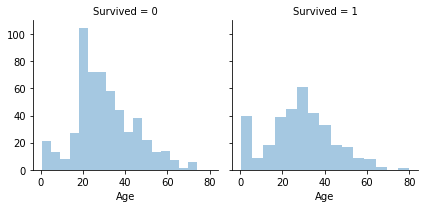

In [49]:
#補值後
df_train['Age']=df_train['Age'].fillna(method='pad')
print('mean:', df_train['Age'].mean()) # age平均
print('std:', df_train['Age'].std())   # age標準差
df_train[df_train['Age'].isnull().values==True]

#補平均數，平均數上沒有差異性，標準差接近
# 連續型用分布圖行來看
g = sns.FacetGrid(df_train, col='Survived')
g.map(sns.distplot, 'Age', kde=False);

mean: 29.581560044893376
std: 14.554589813600968


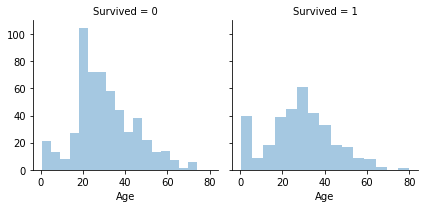

In [64]:
#補值後 ffill = pad
df_train['Age']=df_train['Age'].fillna(method='ffill')
print('mean:', df_train['Age'].mean()) # age平均
print('std:', df_train['Age'].std())   # age標準差
df_train[df_train['Age'].isnull().values==True]

#補平均數，平均數上沒有差異性，標準差接近
# 連續型用分布圖行來看
g = sns.FacetGrid(df_train, col='Survived')
g.map(sns.distplot, 'Age', kde=False);

### 大家可以透過這樣的方式，自己嘗試玩另外兩種遺失的資料。